# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [659]:
#!pip3 install hashlib

In [660]:
import hashlib as hs

In [661]:
import pandas as pd
import numpy as np

In [662]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 1)

In [663]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [664]:
print(data[data['ID']==173116])

        ID Subject school sex  age address famsize Pstatus Medu Fedu  \
94  173116  Math    GP     M   18   U       LE3     T       3    4     

        Mjob   Fjob reason guardian  traveltime  studytime  failures  \
94  services  other  home   mother   1           2          0          

   schoolsup famsup paid activities nursery higher internet romantic  famrel  \
94  no        no     no   yes        yes     yes    yes      yes      4.0      

    freetime  goout  Dalc  Walc  health  absences cheating  G1  G2  G3  
94  3         3      1.0   3.0   5       11        no       16  15  15  


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [665]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

Признак  \
0   ID           
1   Subject      
2   school       
3   sex          
4   age          
5   address      
6   famsize      
7   Pstatus      
8   Medu         
9   Fedu         
10  Mjob         
11  Fjob         
12  reason       
13  guardian     
14  traveltime   
15  studytime    
16  failures     
17  schoolsup    
18  famsup       
19  paid         
20  activities   
21  nursery      
22  higher       
23  internet     
24  romantic     
25  famrel       
26  freetime     
27  goout        
28  Dalc         
29  Walc         
30  health       
31  absences     
32  cheating     
33  G1           
34  G2           
35  G3           

                                                                                                                                                                              Описание  
0   Уникальный номер наблюдения                                                                                                                                                         
1   Предмет: 'Math' - математика, 'Por' - португальский язык                                                                                                                            
2   Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira                                                                                                                          
3   Пол студента: 'F' - женский, 'M' - мужской                                                                                                                                          
4   Возраст студента                                                                                                                                                                    
5   Место проживания студента: 'U' - в городе, 'R' - за городом                                                                                                                         
6   Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3                                                                                                                             
7   Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно                                                                                                                      
8   Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование                                                
9   Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование                                                  
10  Работа матери: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое  
11  Работа отца: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое    
12  Причина, по которой студент выбрал данную школу: 'home' - рядом с домом, 'reputation' - репутация школы, 'course' - читаемые курсы, 'other' - другое                                
13  Опекун студента (student's guardian): 'mother', 'father' или 'other'                                                                                                                
14  Время в пути от дома до школы: 1 - < 15 мин, 2 - от 15 до 30 мин, 3 - от 30 мин до 1 часа, 4 - > 1 часа                                                                             
15  Количество часов на учебу в неделю: 1 - < 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, 4 - > 10 часов                                                                        
16  Число завалов студента по предыдущим курсам:  n если 1<=n<3, иначе 4                                                                                                                
17  Дополн

<br>  
## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 10](#task10)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [666]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   object 
 18  famsup      1044 non-null   object 
 19  paid        1044 non-null  

In [667]:
data.Subject.value_counts()

Por     649
Math    395
Name: Subject, dtype: int64

In [668]:
data.school.value_counts ()

GP    772
MS    272
Name: school, dtype: int64

In [669]:
data.sex.value_counts ()

F    591
M    446
m    7  
Name: sex, dtype: int64

In [670]:
data.loc[data['sex'] == 'm', 'sex'] = 'M'

In [671]:
data.sex.value_counts()

F    591
M    453
Name: sex, dtype: int64

In [672]:
data.address.value_counts()

U    759
R    285
Name: address, dtype: int64

In [673]:
data.famsize.value_counts()

GT3    738
LE3    306
Name: famsize, dtype: int64

In [674]:
data.Pstatus.value_counts()

T    918
A    121
t    5  
Name: Pstatus, dtype: int64

In [675]:
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'

In [676]:
data.Medu.value_counts ()

4    306
2    289
3    238
1    202
o    6  
0    3  
Name: Medu, dtype: int64

In [677]:
data.loc[data['Medu'] == 'o', 'Medu'] = '0'

In [678]:
data.Fedu.value_counts ()

2    324
1    256
3    231
4    224
0    6  
o    3  
Name: Fedu, dtype: int64

In [679]:
data.loc[data['Fedu'] == 'o', 'Fedu'] = '0'

In [680]:
data.Mjob.value_counts ()

other       399
services    239
at_home     184
teacher     130
health      82 
at-home     10 
Name: Mjob, dtype: int64

In [681]:
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'

In [682]:
data.Fjob.value_counts ()

other       584
services    292
teacher     65 
at_home     52 
health      41 
at-home     10 
Name: Fjob, dtype: int64

In [683]:
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'

In [684]:
data.reason.value_counts ()

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64

In [685]:
data.guardian.value_counts ()

mother    728
father    236
other     73 
futher    7  
Name: guardian, dtype: int64

In [686]:
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'

In [687]:
data.traveltime.value_counts ()

1    623
2    320
3    77 
4    24 
Name: traveltime, dtype: int64

In [688]:
data.studytime.value_counts ()

2    503
1    317
3    162
4    62 
Name: studytime, dtype: int64

In [689]:
data.failures.value_counts ()

0    861
1    120
2    33 
3    30 
Name: failures, dtype: int64

In [690]:
data.schoolsup.value_counts ()

no     925
yes    119
Name: schoolsup, dtype: int64

In [691]:
data.famsup.value_counts ()

yes    640
no     404
Name: famsup, dtype: int64

In [692]:
data.paid.value_counts ()

no     824
yes    220
Name: paid, dtype: int64

In [693]:
data.activities.value_counts ()

no     528
yes    516
Name: activities, dtype: int64

In [694]:
data.nursery.value_counts ()

yes    835
no     209
Name: nursery, dtype: int64

In [695]:
data.higher.value_counts ()

yes    955
no     89 
Name: higher, dtype: int64

In [696]:
data.internet.value_counts ()

yes    827
no     217
Name: internet, dtype: int64

In [697]:
data.romantic.value_counts ()

no     664
yes    370
Name: romantic, dtype: int64

In [698]:
data.famrel.value_counts ()

4.0    508
5.0    283
3.0    167
2.0    46 
1.0    30 
Name: famrel, dtype: int64

In [699]:
data.freetime.value_counts ()

3    408
4    293
2    171
5    108
1    64 
Name: freetime, dtype: int64

In [700]:
data.goout.value_counts ()

3    335
2    248
4    227
5    163
1    71 
Name: goout, dtype: int64

In [701]:
data.Dalc.value_counts ()

1.0    719
2.0    194
3.0    69 
5.0    26 
4.0    26 
Name: Dalc, dtype: int64

In [702]:
data.Walc.value_counts ()

1.0    393
2.0    231
3.0    199
4.0    138
5.0    73 
Name: Walc, dtype: int64

In [703]:
data.health.value_counts ()

5    395
3    215
4    174
1    137
2    123
Name: health, dtype: int64

In [704]:
data.cheating.value_counts ()

yes    175
no     169
Name: cheating, dtype: int64

In [705]:
data.G1.value_counts ()

10    146
11    130
12    117
13    105
14    101
9     96 
8     83 
7     70 
15    59 
16    44 
6     33 
17    24 
18    15 
5     12 
19    4  
4     3  
3     1  
0     1  
Name: G1, dtype: int64

In [706]:
data.G2.value_counts ()

11    138
10    129
12    127
9     122
13    117
14    77 
15    72 
8     72 
16    38 
7     37 
18    26 
17    25 
6     21 
0     20 
5     18 
19    4  
4     1  
Name: G2, dtype: int64

In [707]:
data.G3.value_counts ()

10    153
11    151
13    113
12    103
14    90 
15    82 
8     67 
9     63 
0     53 
16    52 
17    35 
18    27 
7     19 
6     18 
5     8  
19    7  
4     1  
1     1  
20    1  
Name: G3, dtype: int64

In [708]:
data.ID = data.ID.astype('object')
data.Subject = data.Subject.astype('category')
data.school = data.school.astype('category')
data.sex = data.sex.astype('category')
data.address = data.address.astype('category')
data.famsize = data.famsize.astype('category')
data.Pstatus = data.Pstatus.astype('category')
data.Medu = data.Medu.astype('category')
data.Fedu = data.Fedu.astype('category')
data.Mjob = data.Mjob.astype('category')
data.Fjob = data.Fjob.astype('category')
data.reason = data.reason.astype('category')
data.guardian = data.guardian.astype('category')    
data.traveltime = data.traveltime.astype('category')
data.studytime = data.studytime.astype('category')  
#data.failures = data.failures.astype('category')
data.schoolsup = data.schoolsup.astype('category')
data.famsup = data.famsup.astype('category')
data.paid = data.paid.astype('category')
data.activities = data.activities.astype('category')
data.nursery = data.nursery.astype('category')
data.higher = data.higher.astype('category')
data.internet = data.internet.astype('category')
data.romantic = data.romantic.astype('category')
data.famrel = data.famrel.astype('category')
data.freetime = data.freetime.astype('category')
data.goout = data.goout.astype('category')
data.Dalc = data.Dalc.astype('category')
data.Walc = data.Walc.astype('category')
data.health = data.health.astype('category')
data.cheating = data.cheating.astype('category')
#data.G1 = data.G1.astype('category')
#data.G2 = data.G2.astype('category')
#data.G3 = data.G3.astype('category')

In [709]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          1044 non-null   object  
 1   Subject     1044 non-null   category
 2   school      1044 non-null   category
 3   sex         1044 non-null   category
 4   age         1044 non-null   int64   
 5   address     1044 non-null   category
 6   famsize     1044 non-null   category
 7   Pstatus     1044 non-null   category
 8   Medu        1044 non-null   category
 9   Fedu        1044 non-null   category
 10  Mjob        1044 non-null   category
 11  Fjob        1044 non-null   category
 12  reason      1044 non-null   category
 13  guardian    1044 non-null   category
 14  traveltime  1044 non-null   category
 15  studytime   1044 non-null   category
 16  failures    1044 non-null   int64   
 17  schoolsup   1044 non-null   category
 18  famsup      1044 non-null   category
 19  paid  

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [710]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          1044 non-null   object  
 1   Subject     1044 non-null   category
 2   school      1044 non-null   category
 3   sex         1044 non-null   category
 4   age         1044 non-null   int64   
 5   address     1044 non-null   category
 6   famsize     1044 non-null   category
 7   Pstatus     1044 non-null   category
 8   Medu        1044 non-null   category
 9   Fedu        1044 non-null   category
 10  Mjob        1044 non-null   category
 11  Fjob        1044 non-null   category
 12  reason      1044 non-null   category
 13  guardian    1044 non-null   category
 14  traveltime  1044 non-null   category
 15  studytime   1044 non-null   category
 16  failures    1044 non-null   int64   
 17  schoolsup   1044 non-null   category
 18  famsup      1044 non-null   category
 19  paid  

Видим, что по четырем признакам одинаковое число наблюдений без ответа.("romantic", "famrel", "Dalc", "Walc")
Предположим, что это одинаковые наблюдения(взаимосвязаны)
Признак "cheating" имеет всего 344 "ненулевых" наблюдения
Значит есть неуверенность в том, не списывают ли они. Решили, что не списывают

In [711]:
data['cheating'].fillna('no')

0       no 
1       no 
2       yes
3       no 
4       yes
5       no 
6       no 
7       no 
8       no 
9       no 
10      no 
11      no 
12      no 
13      yes
14      yes
15      no 
16      yes
17      yes
18      no 
19      yes
20      no 
21      yes
22      no 
23      no 
24      no 
25      no 
26      yes
27      no 
28      yes
29      yes
30      no 
31      no 
32      no 
33      no 
34      no 
35      no 
36      no 
37      no 
38      no 
39      no 
40      no 
41      no 
42      no 
43      no 
44      no 
45      no 
46      no 
47      yes
48      no 
49      no 
50      yes
51      no 
52      no 
53      no 
54      no 
55      no 
56      yes
57      no 
58      no 
59      yes
60      no 
61      no 
62      no 
63      no 
64      no 
65      no 
66      no 
67      no 
68      no 
69      no 
70      no 
71      no 
72      no 
73      yes
74      no 
75      no 
76      yes
77      no 
78      no 
79      yes
80      no 
81      no 
82      no 
83  

In [712]:
data['romantic'].describe(include=['category'])

count     1034
unique    2   
top       no  
freq      664 
Name: romantic, dtype: object

In [713]:
data['romantic'].fillna('no')

0       no 
1       no 
2       no 
3       no 
4       no 
5       yes
6       no 
7       yes
8       no 
9       no 
10      no 
11      yes
12      yes
13      no 
14      no 
15      no 
16      no 
17      no 
18      no 
19      yes
20      no 
21      no 
22      no 
23      yes
24      yes
25      no 
26      yes
27      no 
28      no 
29      no 
30      yes
31      no 
32      no 
33      no 
34      no 
35      no 
36      no 
37      no 
38      no 
39      yes
40      no 
41      no 
42      no 
43      no 
44      no 
45      no 
46      no 
47      yes
48      yes
49      no 
50      no 
51      no 
52      no 
53      yes
54      no 
55      yes
56      no 
57      no 
58      yes
59      yes
60      no 
61      no 
62      no 
63      yes
64      no 
65      yes
66      no 
67      yes
68      no 
69      no 
70      yes
71      no 
72      no 
73      no 
74      no 
75      no 
76      no 
77      no 
78      no 
79      no 
80      no 
81      no 
82      yes
83  

In [714]:
data['famrel'].describe(include=['category'])
#data['famrel'].mean() # среднее значение по столбцу

count     1034.0
unique    5.0   
top       4.0   
freq      508.0 
Name: famrel, dtype: float64

In [715]:
data['famrel'].fillna(4)

0       3.0
1       5.0
2       4.0
3       4.0
4       4.0
5       3.0
6       1.0
7       1.0
8       4.0
9       3.0
10      4.0
11      4.0
12      4.0
13      4.0
14      4.0
15      5.0
16      1.0
17      4.0
18      4.0
19      5.0
20      3.0
21      5.0
22      3.0
23      1.0
24      3.0
25      3.0
26      4.0
27      4.0
28      2.0
29      5.0
30      4.0
31      4.0
32      4.0
33      5.0
34      2.0
35      4.0
36      4.0
37      3.0
38      5.0
39      5.0
40      4.0
41      3.0
42      4.0
43      4.0
44      3.0
45      3.0
46      4.0
47      5.0
48      5.0
49      3.0
50      3.0
51      5.0
52      5.0
53      4.0
54      5.0
55      5.0
56      5.0
57      3.0
58      5.0
59      4.0
60      4.0
61      4.0
62      3.0
63      3.0
64      5.0
65      4.0
66      4.0
67      1.0
68      4.0
69      4.0
70      4.0
71      5.0
72      2.0
73      1.0
74      3.0
75      5.0
76      5.0
77      4.0
78      4.0
79      4.0
80      5.0
81      4.0
82      4.0
83  

In [716]:
data['Dalc'].describe(include=['category'])
#data['Dalc'].mean() # среднее значение по столбцу

count     1034.0
unique    5.0   
top       1.0   
freq      719.0 
Name: Dalc, dtype: float64

In [717]:
data['Dalc'].fillna(2)

0       1.0
1       1.0
2       3.0
3       1.0
4       1.0
5       4.0
6       1.0
7       3.0
8       1.0
9       1.0
10      1.0
11      1.0
12      2.0
13      2.0
14      1.0
15      1.0
16      1.0
17      3.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      3.0
24      1.0
25      1.0
26      2.0
27      2.0
28      2.0
29      2.0
30      1.0
31      1.0
32      1.0
33      1.0
34      1.0
35      1.0
36      1.0
37      1.0
38      1.0
39      1.0
40      3.0
41      1.0
42      1.0
43      2.0
44      1.0
45      1.0
46      1.0
47      1.0
48      5.0
49      2.0
50      3.0
51      1.0
52      1.0
53      5.0
54      3.0
55      2.0
56      3.0
57      3.0
58      2.0
59      1.0
60      2.0
61      1.0
62      1.0
63      1.0
64      1.0
65      2.0
66      1.0
67      1.0
68      1.0
69      2.0
70      2.0
71      4.0
72      1.0
73      1.0
74      1.0
75      3.0
76      1.0
77      4.0
78      1.0
79      1.0
80      1.0
81      1.0
82      1.0
83  

In [718]:
data['Walc'].describe(include=['category'])
#data['Walc'].mean() # среднее значение по столбцу

count     1034.0
unique    5.0   
top       1.0   
freq      393.0 
Name: Walc, dtype: float64

In [719]:
data['Walc'].fillna(2)

0       4.0
1       3.0
2       5.0
3       1.0
4       4.0
5       5.0
6       1.0
7       5.0
8       1.0
9       2.0
10      3.0
11      3.0
12      2.0
13      3.0
14      2.0
15      4.0
16      3.0
17      3.0
18      2.0
19      2.0
20      3.0
21      1.0
22      1.0
23      5.0
24      1.0
25      3.0
26      2.0
27      3.0
28      4.0
29      3.0
30      4.0
31      1.0
32      2.0
33      1.0
34      1.0
35      2.0
36      2.0
37      2.0
38      2.0
39      3.0
40      4.0
41      1.0
42      1.0
43      2.0
44      1.0
45      1.0
46      1.0
47      3.0
48      5.0
49      4.0
50      4.0
51      3.0
52      1.0
53      5.0
54      3.0
55      3.0
56      4.0
57      3.0
58      2.0
59      2.0
60      5.0
61      1.0
62      4.0
63      2.0
64      1.0
65      3.0
66      1.0
67      1.0
68      1.0
69      3.0
70      3.0
71      3.0
72      3.0
73      2.0
74      3.0
75      4.0
76      1.0
77      4.0
78      4.0
79      3.0
80      1.0
81      3.0
82      4.0
83  

ЗАДАНИЕ НОМЕР 10 (ВЫПОЛНИМ ЗАРАНЕЕ ИДЕНТИФИКАЦИЮ УНИКАЛЬНЫХ СТУДЕНТОВ)

In [720]:
# находим студентов по списку одинаковых признаков
data['new'] = data[['school','sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
                        'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
                        'studytime', 'failures', 'schoolsup', 'famsup', 'activities',
                       'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 
                        'goout', 'Dalc', 'Walc', 'health', 'absences']].astype(str).values.sum(axis=1)

# создаем новое поле с id студента в виде хеша по строке склеенной из значений одинаковых признаков
data['student_id']= data['new'].apply(lambda x: hs.sha1(str(x).encode('utf-8')).hexdigest())

# выводим информацию об измеренияъх через id студентов
data['student_id'].describe(include=['category'])
#print(data['student_id'].nunique())

count     1044                                    
unique    967                                     
top       7b3e54285b542ec69aa820957285ce56e03bb552
freq      2                                       
Name: student_id, dtype: object

In [779]:
# находим студентов по списку одинаковых признаков
dups = data.duplicated(['school','sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
                        'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
                        'studytime', 'failures', 'schoolsup', 'famsup', 'activities',
                       'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 
                        'goout', 'Dalc', 'Walc', 'health', 'absences'])

# выбираем студентов с больше чем 1м измерением
df = data[dups == True]

# выводи число таких студентов
print(df.ID.count())

# формируем список id таких студентов
ls = df.student_id.tolist()

# группируем оценки студентов по предмету 
df_sub = data.groupby(['student_id', 'Subject'])['G3'].mean()

# удаляем NaN оценки (результат группировки для отсутствуюзщих значений)
df_sub_drop = df_sub.dropna();

# фильтруем 
df_sub_drop_filtred = df_sub_drop.loc[ls]

# выводим результаты всех оценок 
pd.set_option('display.max_rows', None)

#print(df_sub_drop_filtred)

#print(data.student_id.unique())


77


In [780]:
df = data.groupby(['student_id']).first()

### Задание 3  
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [723]:
data.describe()

age     failures     absences           G1           G2  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean   16.726054    0.264368     4.434866     11.213602    11.246169     
std    1.239975     0.656142     6.210017     2.983394     3.285071      
min    15.000000    0.000000     0.000000     0.000000     0.000000      
25%    16.000000    0.000000     0.000000     9.000000     9.000000      
50%    17.000000    0.000000     2.000000     11.000000    11.000000     
75%    18.000000    0.000000     6.000000     13.000000    13.000000     
max    22.000000    3.000000     75.000000    19.000000    19.000000     

                G3  
count  1044.000000  
mean   11.341954    
std    3.864796     
min    0.000000     
25%    10.000000    
50%    11.000000    
75%    14.000000    
max    20.000000

In [724]:
data.describe(include=['category'])

Subject school   sex address famsize Pstatus  Medu  Fedu   Mjob   Fjob  \
count   1044    1044   1044  1044    1044    1044    1044  1044  1044   1044    
unique  2       2      2     2       2       2       5     5     5      5       
top     Por     GP     F     U       GT3     T       4     2     other  other   
freq    649     772    591   759     738     923     306   324   399    584     

        reason guardian  traveltime  studytime schoolsup famsup  paid  \
count   1044    1044     1044        1044       1044      1044   1044   
unique  4       3        4           4          2         2      2      
top     course  mother   1           2          no        yes    no     
freq    430     728      623         503        925       640    824    

       activities nursery higher internet romantic  famrel  freetime  goout  \
count   1044       1044    1044   1044     1034     1034.0  1044      1044    
unique  2          2       2      2        2        5.0     5         5       
top     no         yes     yes    yes      no       4.0     3         3       
freq    528        835     955    827      664      508.0   408       335     

          Dalc    Walc  health cheating  
count   1034.0  1034.0  1044    344      
unique  5.0     5.0     5       2        
top     1.0     1.0     5       yes      
freq    719.0   393.0   395     175

In [725]:
data.groupby('school')['student_id'].nunique()

school
GP    706
MS    261
Name: student_id, dtype: int64

742 ученика посещают Gabriel Pereira. 266 учеников посещают Mousinho da Silveira.

In [726]:
data.groupby('Subject')['student_id'].nunique()

Subject
Math    395
Por     649
Name: student_id, dtype: int64

395 учеников посещают курсы по математике. 649 учеников посещают курсы по Португальскому языку.

In [728]:
df.head()

ID Subject school sex  age address famsize Pstatus Medu Fedu  \
0     100097  Por     GP     F   16   U       GT3     A       3    4     
1     101021  Por     GP     F   17   U       GT3     T       3    2     
2     102965  Por     GP     M   16   U       LE3     T       1    2     
3     102989  Por     MS     M   17   U       GT3     T       2    3     
4     103131  Por     GP     F   16   U       GT3     T       1    1     
5     103144  Por     GP     M   18   U       LE3     T       3    1     
6     105257  Por     MS     F   18   U       GT3     T       1    1     
7     107639  Por     MS     F   15   R       GT3     T       4    4     
8     107914  Math    GP     F   15   U       LE3     T       3    2     
9     108089  Por     MS     M   16   R       GT3     T       3    4     
10    108254  Por     GP     M   15   U       LE3     T       4    4     
11    108296  Por     GP     M   18   U       LE3     T       3    4     
12    108753  Math    MS     F   18   R       GT3     T       4    4     
13    108825  Por     GP     M   15   U       GT3     T       4    3     
14    114462  Math    GP     F   16   U       LE3     T       2    2     
15    114603  Math    GP     M   17   R       GT3     T       1    3     
16    114933  Math    GP     F   16   U       GT3     T       2    2     
17    116855  Math    GP     F   18   U       GT3     T       4    4     
18    117720  Por     MS     M   15   U       LE3     A       2    1     
19    118666  Por     MS     F   17   R       GT3     T       1    1     
20    118864  Por     MS     F   16   U       GT3     T       3    1     
21    119979  Por     MS     F   17   U       GT3     T       4    4     
22    120102  Math    GP     F   16   U       GT3     A       2    2     
23    122585  Math    GP     M   15   R       GT3     T       4    4     
24    122957  Por     MS     F   16   R       GT3     A       2    2     
25    123006  Por     GP     M   16   R       GT3     T       2    1     
26    124149  Math    MS     M   18   U       LE3     T       4    4     
27    125309  Math    GP     F   17   U       GT3     T       4    4     
28    125717  Math    GP     M   15   U       GT3     T       4    2     
29    127270  Por     MS     F   15   R       GT3     T       3    3     
30    127467  Math    GP     M   18   U       GT3     T       4    2     
31    128162  Math    GP     M   15   U       LE3     T       1    2     
32    128547  Por     GP     M   17   U       LE3     A       4    4     
33    129383  Por     GP     M   16   U       GT3     T       2    3     
34    129646  Por     MS     F   16   U       GT3     T       1    1     
35    129949  Por     GP     M   17   U       LE3     A       3    2     
36    131767  Por     GP     F   16   U       LE3     T       4    4     
37    132104  Por     MS     F   17   R       GT3     T       1    2     
38    132929  Por     GP     F   16   U       GT3     T       4    4     
39    133245  Math    GP     M   18   U       GT3     T       4    2     
40    133412  Por     MS     M   17   R       GT3     T       1    1     
41    135230  Por     MS     M   19   U       GT3     T       3    2     
42    135992  Por     MS     M   18   R       GT3     T       1    0     
43    136559  Por     GP     M   18   U       GT3     T       4    4     
44    137019  Math    GP     M   16   R       GT3     T       4    3     
45    137600  Por     GP     M   15   U       GT3     T       4    4     
46    138695  Por     GP     M   15   U       GT3     T       4    4     
47    138763  Por     MS     F   15   R       LE3     T       1    1     
48    138863  Por     MS     M   17   R       GT3     T       2    1     
49    139439  Math    GP     F   16   U       GT3     T       4    3     
50    141352  Por     MS     M   16   R       GT3     T       1    1     
51    141581  Math    GP     M   17   U       LE3     T       2    3     
52    142175  Math    GP     M   16   U       GT3     T       3    3     
53    142821  

In [729]:
sub = ['Math', 'Por']
res = (data.assign(sub=np.where(data['Subject'].isin(sub), 'Math', 'Por'))
       .loc[data['failures']]
       .groupby(data['Subject'])
       .size()
       .idxmax())
print(res)

Por


Чаще всего заваливают студенты, изучающие Португальский.

In [730]:
#приведем к числовому типу
data.studytime = data.studytime.astype('int64')

In [731]:
data[data['Subject'] == 'Math']['studytime'].mean()

2.0354430379746837

In [732]:
data[data['Subject'] == 'Por']['studytime'].mean()

1.9306625577812018

In [733]:
data.studytime = data.studytime.astype('category')

Получается по обоим предметам ученики тратят примерно от 2 до 5 часов в неделю

{Последний пункт задания} Посмотрев на описательные характеристики нечисловых столбцов, находим столбец "reason"
и в строке "top" стоит "course", значит выбирают школу чаще из-за курса

### Задание 4  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

In [734]:
import numpy as np
import pandas as pd

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
from matplotlib import style
style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

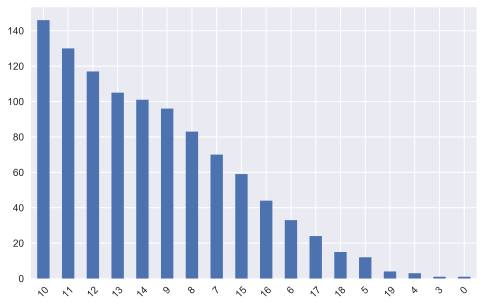

In [735]:
# rot отвечает за угол наклона подписей значений на оси x
data.G1.value_counts().plot(kind='bar', rot=45) 
plt.show()

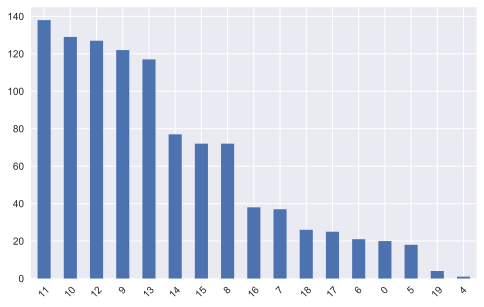

In [736]:
data.G2.value_counts().plot(kind='bar', rot=45) 
plt.show()

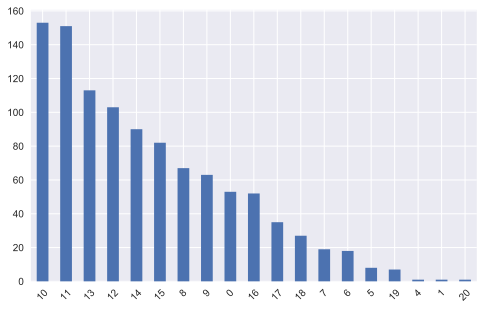

In [737]:
data.G3.value_counts().plot(kind='bar', rot=45) 
plt.show()

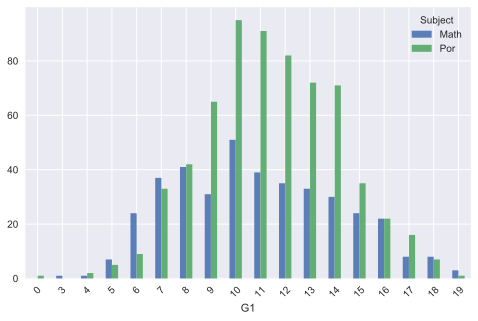

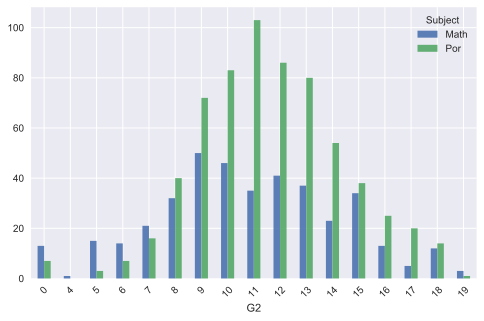

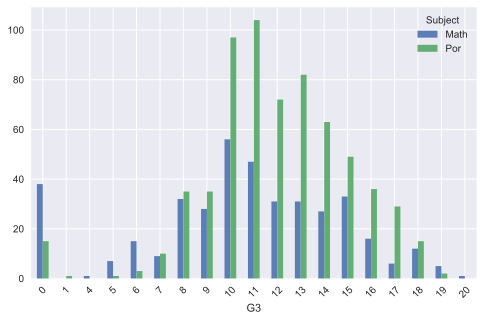

In [738]:
pd.crosstab(data['G1'], data['Subject']).plot(kind='bar', rot=45, alpha=0.9) 
pd.crosstab(data['G2'], data['Subject']).plot(kind='bar', rot=45, alpha=0.9) 
pd.crosstab(data['G3'], data['Subject']).plot(kind='bar', rot=45, alpha=0.9)

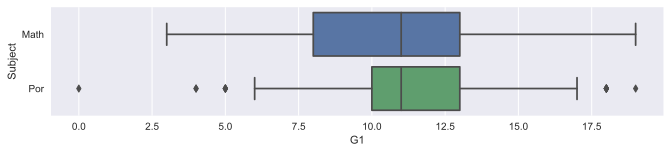

In [739]:
#data.plot.scatter(x='G2', y='Subject', figsize=(11.7, 8.27))
#plt.show()
fig, ax = plt.subplots()
fig.set_size_inches(11, 2)
ax = sns.boxplot(y="Subject", x="G1", data=data, orient="h")

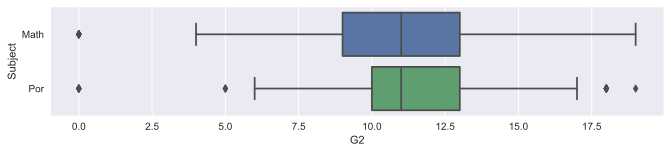

In [740]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 2)
ax = sns.boxplot(y="Subject", x="G2", data=data, orient="h")

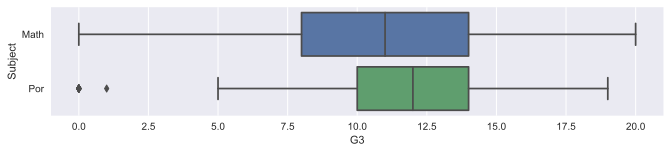

In [741]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 2)
ax = sns.boxplot(y="Subject", x="G3", data=data, orient="h")

Приблизительно одинаковое распределение студентов по оценкам в обоих полугодиях и по итоговой оценке. Есть небольшие отклонения, но они незначительны. Студентов, кто изучает португальский, примерно в 2 раза больше, чем математиков, и по графику видно, что распределение по оценкам по обоим предметам идет почти одинаковое.  За учебный год у математиков больше несдач, а у студентов, изучающих португальский, имеется больше резких скачков в распределении оценок.

### Задание 5  
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

In [742]:
corr_mat = data[['age', 'absences', 'failures',
                      'G1', 'G2','G3']].corr()
corr_mat

age  absences  failures        G1        G2        G3
age       1.000000  0.153196  0.282364 -0.124121 -0.119475 -0.125282
absences  0.153196  1.000000  0.099998 -0.092425 -0.089332 -0.045671
failures  0.282364  0.099998  1.000000 -0.374175 -0.377172 -0.383145
G1       -0.124121 -0.092425 -0.374175  1.000000  0.858739  0.809142
G2       -0.119475 -0.089332 -0.377172  0.858739  1.000000  0.910743
G3       -0.125282 -0.045671 -0.383145  0.809142  0.910743  1.000000

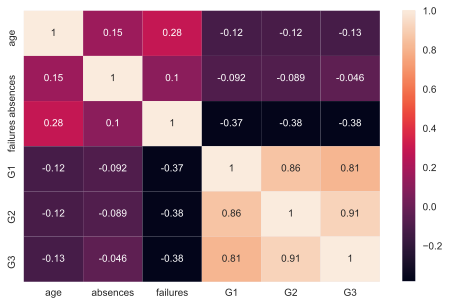

In [743]:
sns.heatmap(corr_mat, annot=True)
plt.ylim((corr_mat.shape[0], 0)) # fixes bug in matplotlib 3.1.1, should be removed in other versions
plt.show()

In [744]:
pd.crosstab(data['failures'], data['G1'])

G1        0  3  4  5   6   7   8   9   10   11   12   13  14  15  16  17  18  \
failures                                                                       
0         1  0  0  5  13  39  56  61  122  119  109  100  95  55  44  24  14   
1         0  1  1  2  11  17  17  23  19   9    7    5    5   2   0   0   1    
2         0  0  2  2  4   8   2   8   2    1    1    0    1   2   0   0   0    
3         0  0  0  3  5   6   8   4   3    1    0    0    0   0   0   0   0    

G1        19  
failures      
0         4   
1         0   
2         0   
3         0

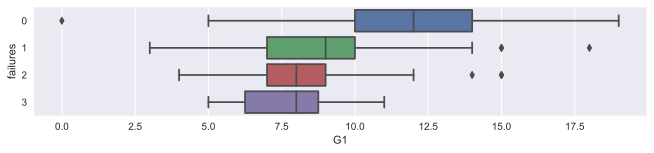

In [745]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 2)
ax = sns.boxplot(y="failures", x="G1", data=data, orient="h")

Завалы по предыдущим курсам были у студентов, которые в первом полугодии в среднем получили оценку ниже 10. Студенты без завалов в предыдущих курсах в первом полугодии в среднем получили оценку выше 10.   
Были случаи во втором полугодии получения оценки 14 и 15 у студентов с двумя завалами и случаи во втором полугодии получения оценки 15 и 18 у студента с одним завалом.

In [746]:
pd.crosstab(data['failures'], data['G2'])

G2         0  4  5   6   7   8   9   10   11   12   13  14  15  16  17  18  19
failures                                                                      
0         10  0  7  12  19  38  86  103  121  117  111  75  70  38  25  25  4 
1         5   0  7  5   11  18  20  21   16   9    5    1   1   0   0   1   0 
2         2   1  2  4   1   6   9   4    0    1    1    1   1   0   0   0   0 
3         3   0  2  0   6   10  7   1    1    0    0    0   0   0   0   0   0

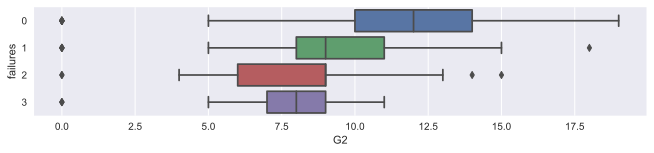

In [747]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 2)
ax = sns.boxplot(y="failures", x="G2", data=data, orient="h")

Завалы по предыдущим курсам были у студентов, которые во втором полугодии в среднем получили оценку ниже 11. Но студенты с одним завалом, по сравнению с первым полугодием, во втором полугодии улучшили оценку. Студенты без завалов в предыдущих курсах, во втором полугодии в среднем получили оценки выше 10.   
Были случаи во втором полугодии получения оценки от 12 до 15 у студентов с двумя завалами. И едининый случай во втором полугодии получения оценки 18 у студента с одним завалом.

In [748]:
pd.crosstab(data['failures'], data['G3'])

G3         0  1  4  5   6  7   8   9   10   11  12   13  14  15  16  17  18  \
failures                                                                      
0         24  0  0  3  17  6  35  44  110  134  95  104  89  80  51  35  26   
1         17  1  0  2  0   6  21  11  29   15   7   8    1   0   1   0   1    
2         6   0  1  1  1   3  5   5   6    1    1   1    0   2   0   0   0    
3         6   0  0  2  0   4  6   3   8    1    0   0    0   0   0   0   0    

G3        19  20  
failures          
0         7   1   
1         0   0   
2         0   0   
3         0   0

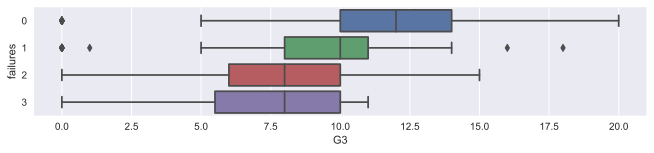

In [749]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 2)
ax = sns.boxplot(y="failures", x="G3", data=data, orient="h")

Завалы по предыдущим курсам были у студентов, которые чаще всего получили итоговую оценку ниже 11, но студенты с одним завалом, в среднем имели оценку немного лучше и были случаи получения оценки 16 и 18.
Студенты без завалов в предыдущих курсах, получили в среднем итоговую оценку ниже 14.

Общая связь оценок и завалов такая, что чем меньше было завалов на предыдущем курсе у студента, тем выше оценку он получил на текущем курсе.

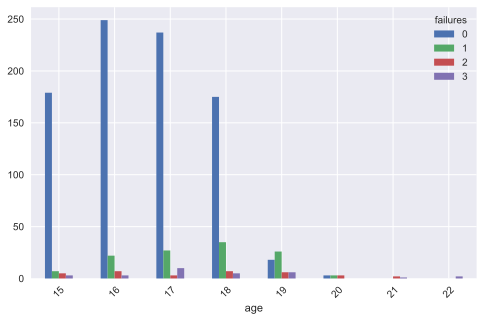

In [750]:
pd.crosstab(data['age'], data['failures']).plot(kind='bar', rot=45)
plt.show()

Мы видим, что чем старше студент, тем доля завалов у него больше.

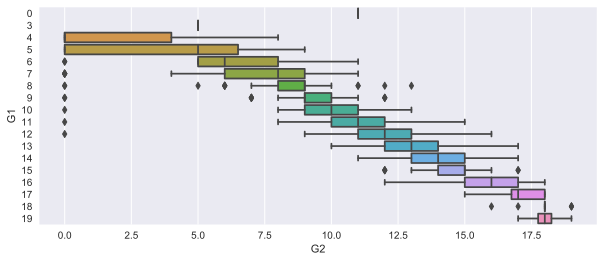

In [751]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax = sns.boxplot(y="G1", x="G2", data=data, orient="h")

Мы видим, что студенты, получившие оценку за первое полугодие меньше 12, имеют случаи не сдачи экзамена во втором полугодии, но в чаще всего их оценки были приблизительно равны в обоих полугодиях. Общий поток тех, кто получил оценку ниже 12 в первом полугодии, имел разброс в оценках больше чем в семь баллов во втором полугодии.

Большинство тех, кто получил оценку выше 12 в первом полугодии, получило оценку такую же, как и в первом полугодии с небольшими отклонениями(2 балла). Общий поток тех, кто получил оценку выше 12 в первом полугодии, имел примерный разброс в оценках в пять баллов во втором полугодии.

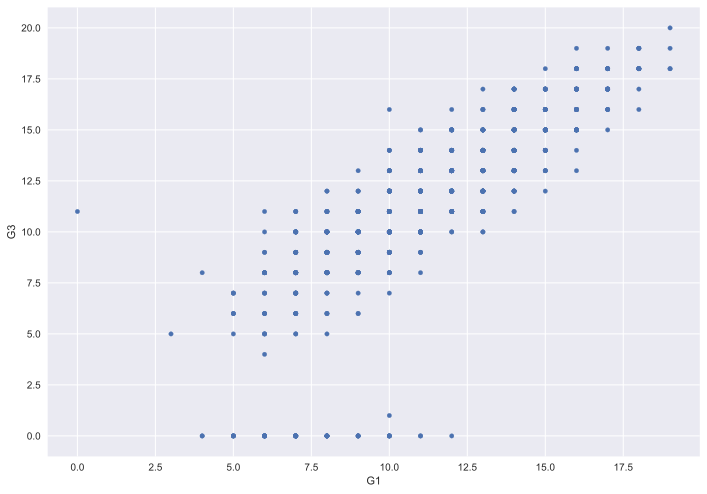

In [752]:
data.plot.scatter(x='G1', y='G3', figsize=(11.7, 8.27))
plt.show()

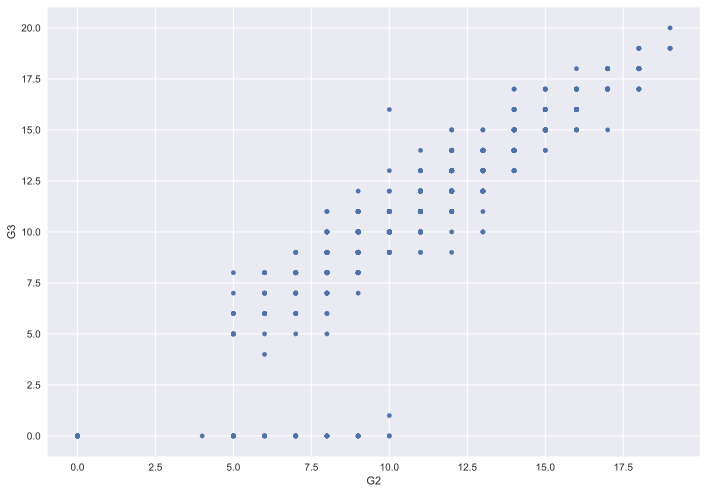

In [753]:
data.plot.scatter(x='G2', y='G3', figsize=(11.7, 8.27))
plt.show()

Оценки(за первое полугодие, второе полугодие, итоговая) очень взаимосвязаны между собой, с повышением/понижением одной оценки повышается/понижается другая.

### Задание 6  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

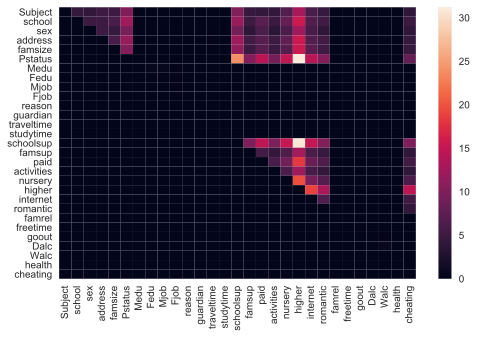

In [754]:
from scipy.stats import chi2_contingency
features = ['Subject', 'school','sex', 'address', 'famsize', 'Pstatus', 'Medu',
                        'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
                        'studytime', 'schoolsup', 'famsup', 'paid','activities',
                       'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 
                        'goout', 'Dalc', 'Walc', 'health', 'cheating']
matr = np.zeros((len(features), len(features)))
for i in range(len(features)):
    for j in range(i+1, len(features)):
        obs = pd.crosstab(data[features[i]], data[features[j]], normalize=True)
        matr[i][j] = float(chi2_contingency(obs)[0])
                               
sns.heatmap(matr, annot=False, xticklabels=features, yticklabels=features)
plt.ylim((matr.shape[0], 0))
plt.show()

In [755]:
pd.crosstab(data['higher'], data['schoolsup'])

schoolsup   no  yes
higher             
no         86   3  
yes        839  116

Мы видим, что студенты, не получавшие помощь от школы, более расположены к получению высшего образования в будущем.

In [756]:
pd.crosstab(data['higher'], data['Pstatus'])

Pstatus    A    T
higher           
no       11   78 
yes      110  845

Мы видим, что студенты, чьи родители живут вместе, более расположены к получению высшего образования в будущем.

In [757]:
pd.crosstab(data['schoolsup'], data['Pstatus'])

Pstatus      A    T
schoolsup          
no         105  820
yes        16   103

Мы видим, что студенты, чьи родители живут вместе, меньше нуждаются в дополнительной помощи в учебе.

In [758]:
pd.crosstab(data['nursery'], data['higher'])

higher   no  yes
nursery         
no       23  186
yes      66  769

Мы видим, что студенты, ходившие в детский сад, более расположены к получению высшего образования в будущем.

In [759]:
pd.crosstab(data['internet'], data['higher'])

higher    no  yes
internet         
no        26  191
yes       63  764

Мы видим, что студенты, имеющие доступ в интернет, более расположены к получению высшего образования в будущем.

In [760]:
pd.crosstab(data['paid'], data['higher'])

higher  no  yes
paid           
no      85  739
yes     4   216

Мы видим, что студенты, не имеющие платных дополнительных занятий, более расположены к получению высшего образования в будущем.

### Задание  7  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

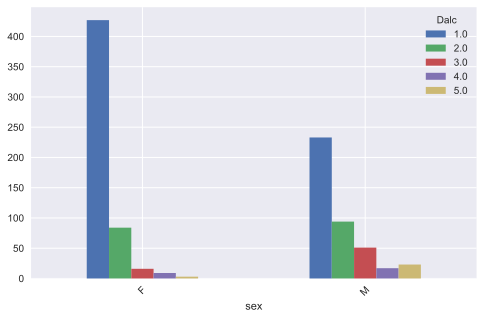

In [781]:
pd.crosstab(df['sex'], df['Dalc']).plot(kind='bar', rot=45)
plt.show()

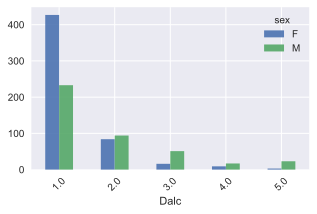

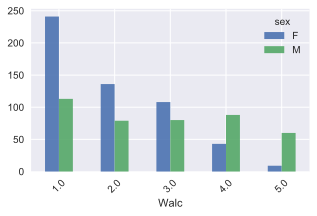

In [782]:
pd.crosstab(df['Dalc'], df['sex']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Walc'], df['sex']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))

И по будням и по выходным женщины меньше употребляют алкоголя, чем мужчины.В выходные общее количество людей потребляющих алкоголь увеличивается (как мужчин, так и женщин).

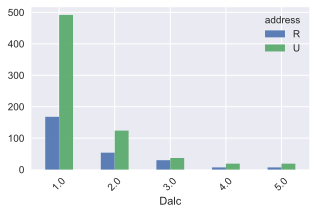

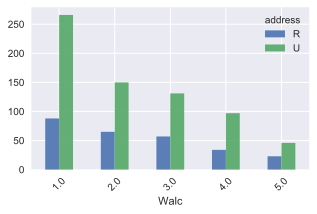

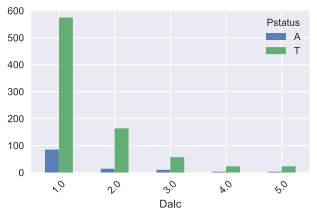

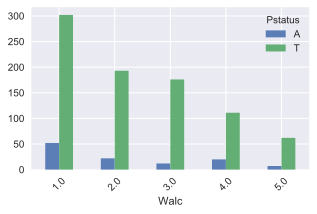

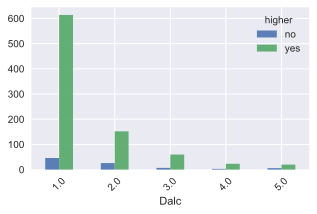

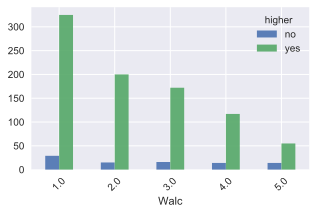

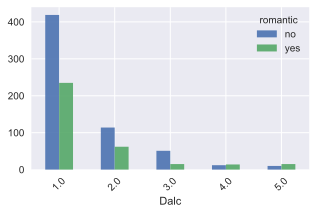

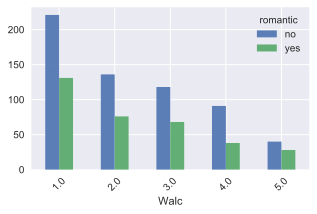

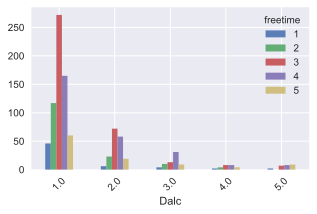

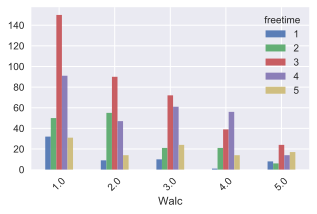

In [783]:
pd.crosstab(df['Dalc'], df['address']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Walc'], df['address']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Dalc'], df['Pstatus']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Walc'], df['Pstatus']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Dalc'], df['higher']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Walc'], df['higher']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Dalc'], df['romantic']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Walc'], df['romantic']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Dalc'], df['freetime']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(df['Walc'], df['freetime']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))

(address)Студенты пьют одинаково, независимо от места жительства(учитывая, что за городом живет меньше студентов). В выходные дни, обе группы учеников все также предпочитают не употреблять алкоголь.
Но доля учеников "пьющих очень мало" все-таки больше среди тех, кто живет в городе. 

(Pstatus)Учеников, чьи родители живут вместе, значительно больше. Большинство из них предпочитают не употреблять алкогль в будние дни, так же, как и ученики, чьи родители живут раздельно. Количество пьющих в выходные дни учеников увеличилосьв обеих группах.

(higher)Количество студентов, нежелающих получать высшее образование, значительно меньше, чем других. Но при этом доля непьющих среди них по сравнению с пьющими (много и очень много) гораздо меньше, чем доля непьщих среди тех, кто собрался получать высшее (и в будние и в выходные дни).

(romantic)Учитывая, что учеников, не состоящих в отношениях, больше примерно в 2 раза, обе группы учеников употребляют алкоголь примерно в одинаковых количествах (и в будние и в выходные дни).

(freetime)В каждой категории разное количество студентов. В будние дни, все группы предпочитают воздержаться от алкоголя. У тех, у кого очень мало и мало свободного времени, практически не пьют в рабочие дни. В выходные дни, доля тех, кто выпивает, увеличилась во всех группах. Особенно заметно среди тех у кого малое и среднее количество свободного времени после занятий,


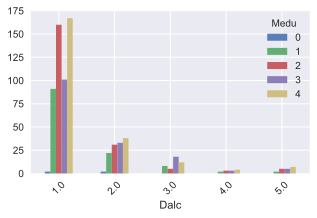

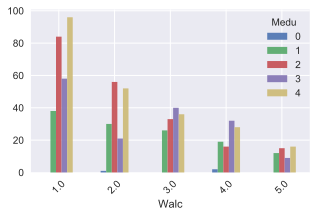

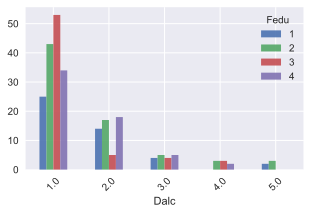

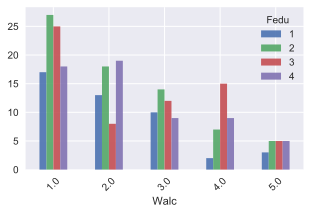

In [784]:
pd.crosstab(data['Dalc'], data[data['guardian'] == 'mother']['Medu']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(data['Walc'], data[data['guardian'] == 'mother']['Medu']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(data['Dalc'], data[data['guardian'] == 'father']['Fedu']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))
pd.crosstab(data['Walc'], data[data['guardian'] == 'father']['Fedu']).plot(kind='bar', rot=45, alpha=0.9, figsize=(5,3))

В будние дни студенты, чьим опекуном является мать, мало пьют, независимо от образования. В выходные дни количество пьющих студентов увеличилось во всех категориях, но наибольший процент пьющих среди студентов, у которых образование матери «начальная школа» или среднее.
В будние дни студенты, чьим опекуном является отец, мало пьют, независимо от образования (у кого образование отца среднее или высшее не пьют в будни «очень много» вообще). В выходные дни количество пьющих студентов увеличилось во всех категориях, но наибольший процент "много" пьющих среди студентов, у которых среднее или высшее образование у отца.
Общая тенденция такая, что в выходные увеличивается количество пьющих, но в выходные преобладает процент пьющих у тех учеников, чей опекун имеет среднее образование.

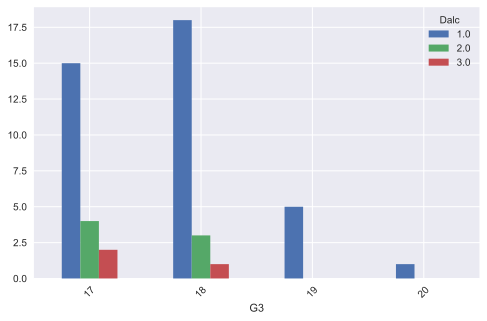

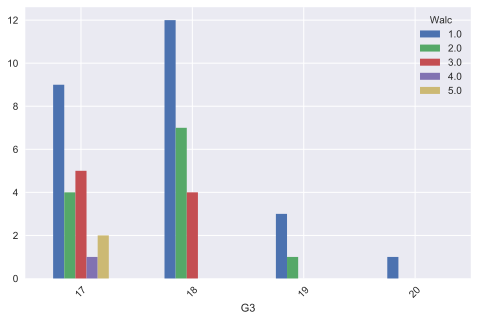

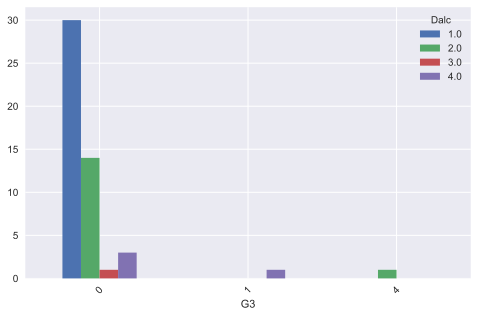

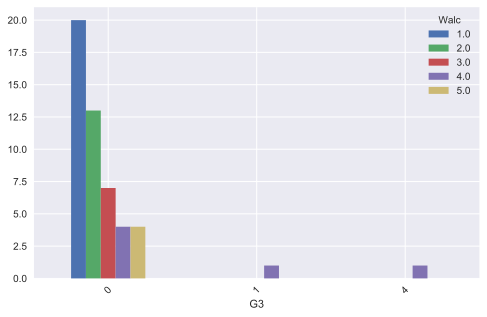

In [785]:
pd.crosstab(df['G3'].sort_values(ascending=False)[0:50], df.Dalc).plot(kind='bar', rot=45) #лучшие
pd.crosstab(df['G3'].sort_values(ascending=False)[0:50], df.Walc).plot(kind='bar', rot=45)
pd.crosstab(df['G3'].sort_values(ascending=True)[0:50], df.Dalc).plot(kind='bar', rot=45) #худшие
pd.crosstab(df['G3'].sort_values(ascending=True)[0:50], df.Walc).plot(kind='bar', rot=45)
plt.show()

Большинство 50 лучших учеников очень мало или мало употребляют алкоголь и в будни и в выходные. Среди 50 худших учеников больше процент тех, кто употребляет алкоголь по сравнению с лучшими учениками. В выходные доля тех кто много и очень много употребляет алкоголь среди худших учеников значительно больше чем среди 50 лучших учеников.

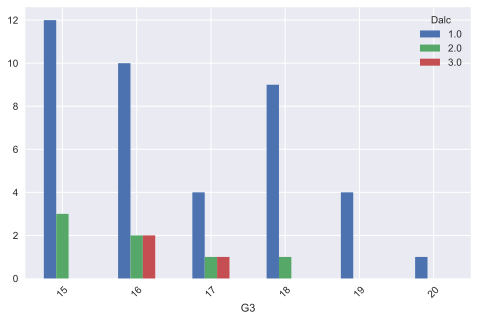

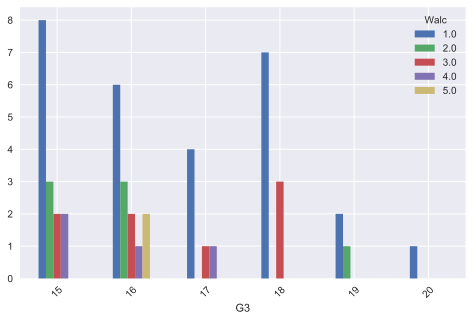

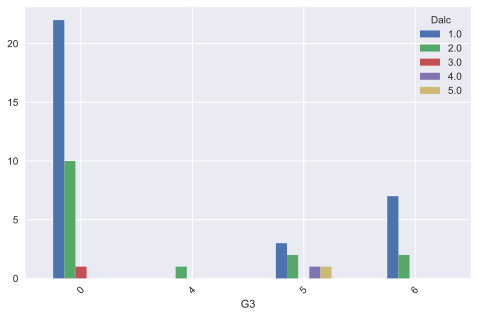

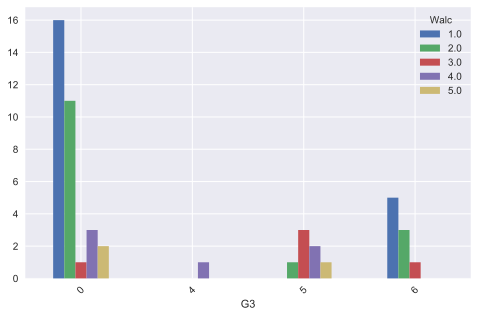

In [786]:
pd.crosstab(df[df['Subject'] == 'Math']['G3'].sort_values(ascending=False)[0:50], df.Dalc).plot(kind='bar', rot=45)#лучшие
pd.crosstab(df[df['Subject'] == 'Math']['G3'].sort_values(ascending=False)[0:50], df.Walc).plot(kind='bar', rot=45)
pd.crosstab(df[df['Subject'] == 'Math']['G3'].sort_values(ascending=True)[0:50], df.Dalc).plot(kind='bar', rot=45)#худшие
pd.crosstab(df[df['Subject'] == 'Math']['G3'].sort_values(ascending=True)[0:50], df.Walc).plot(kind='bar', rot=45)
plt.show()

Лучшие ученики на курсе математики в среднем меньше употребляют алкоголя в отличие от худших учеников(и в будни, и в выходные). Подавляющее большинство лучших учеников употребляют алкоголь очень мало.  Число пьющих студентов увеличивается в обеих категориях в выходные дни.

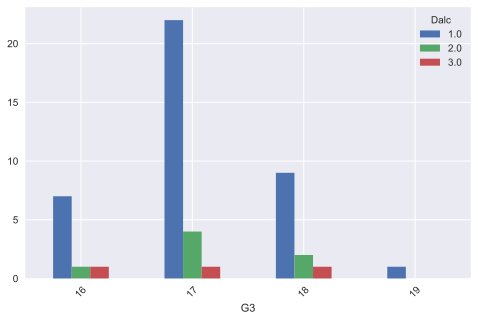

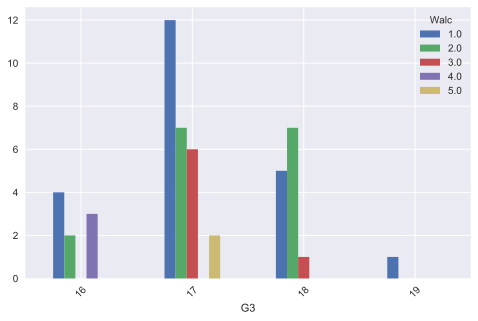

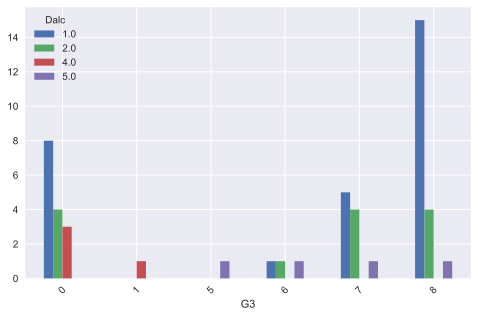

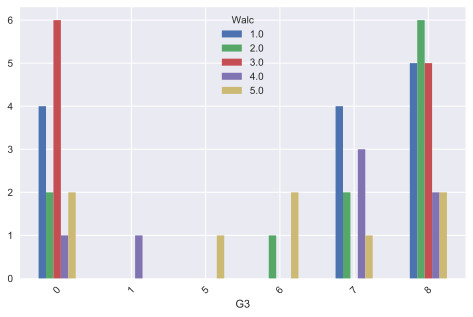

In [787]:
pd.crosstab(df[df['Subject'] == 'Por']['G3'].sort_values(ascending=False)[0:50], df.Dalc).plot(kind='bar', rot=45)
pd.crosstab(df[df['Subject'] == 'Por']['G3'].sort_values(ascending=False)[0:50], df.Walc).plot(kind='bar', rot=45)
pd.crosstab(df[df['Subject'] == 'Por']['G3'].sort_values(ascending=True)[0:50], df.Dalc).plot(kind='bar', rot=45)
pd.crosstab(df[df['Subject'] == 'Por']['G3'].sort_values(ascending=True)[0:50], df.Walc).plot(kind='bar', rot=45)
plt.show()

Лучшие и худшие студенты по курсу Португальский язык начинают больше пить в выходные дни. Однако, худшие студенты пьют больше лучших учеников и в будни и выходные дни.
По сравнению с математикой доля учеников предпочитающих выпить в выходные дни больше среди изучающих португальский язык.


Общий вывод, что алкоголь значительно влияет на успеваемость студента: чем больше алкоголя студент употребляет, тем хуже его успеваемость

### Задание 8     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BFA8C71B70>,
      dtype=object)

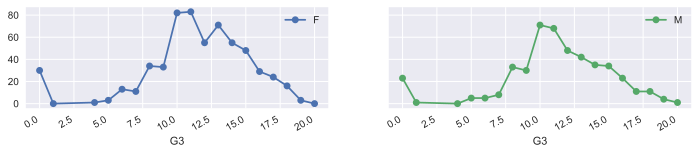

In [788]:
pd.crosstab(data['G3'], data['sex']).plot(subplots=True, 
                                               layout=(5, 4), 
                                               sharex=True, 
                                               sharey=True,
                                               figsize=(25,12),
                                               linestyle='-', 
                                               marker='o')

Учитывая, что количество мужчин больше количества женщин, то можно выявить,что пол не сильно влияет на распределение оценок

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BFA905EE10>,
      dtype=object)

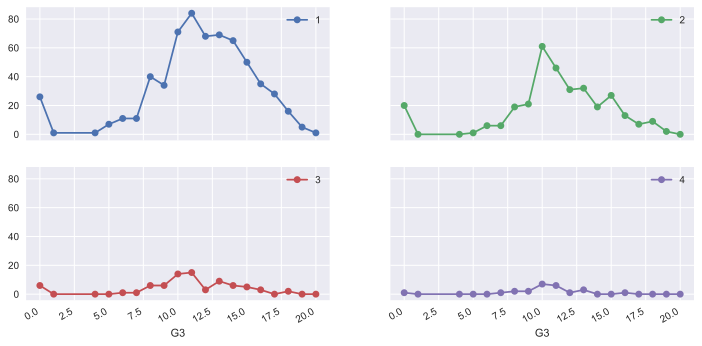

In [789]:
pd.crosstab(data['G3'], data['traveltime']).plot(subplots=True, 
                                               layout=(2, 2), 
                                               sharex=True, 
                                               sharey=True,
                                               figsize=(12,6),
                                               linestyle='-', 
                                               marker='o')

По графикам видно, что дорога до учебы не сильно влияет на успеваемость студента, везде она примерно средняя.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BFA9968CC0>,
      dtype=object)

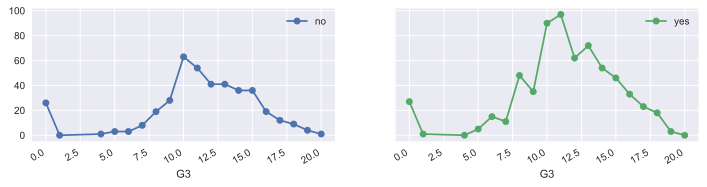

In [790]:
pd.crosstab(data['G3'], data['famsup']).plot(subplots=True, 
                                               layout=(2, 2), 
                                               sharex=True, 
                                               sharey=True,
                                               figsize=(12,6),
                                               linestyle='-', 
                                               marker='o')

Студенты, которым в учебе помогала семья, получили итоговую оценку лучше.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BFA9C405C0>,
      dtype=object)

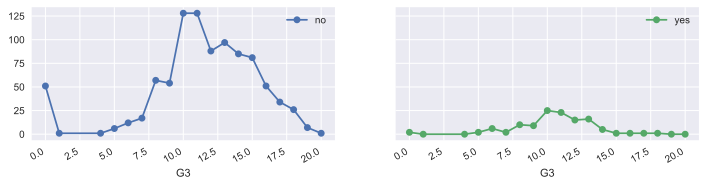

In [791]:
pd.crosstab(data['G3'], data['schoolsup']).plot(subplots=True, 
                                               layout=(2, 2), 
                                               sharex=True, 
                                               sharey=True,
                                               figsize=(12,6),
                                               linestyle='-', 
                                               marker='o')

Количество студентов, которым помогала школа мало, но среди них меньше количество завалов, чем у другой группы студентов.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BFA9C496A0>,
      dtype=object)

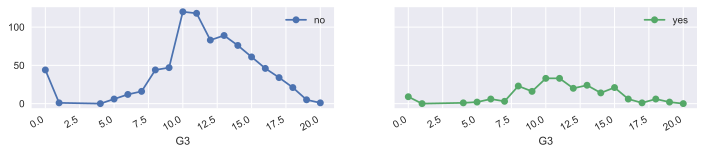

In [792]:
pd.crosstab(data['G3'], data['paid']).plot(subplots=True, 
                                               layout=(5, 4), 
                                               sharex=True, 
                                               sharey=True,
                                               figsize=(25,12),
                                               linestyle='-', 
                                               marker='o')

Студенты, которые не берут платные дополнительные курсы сдали не намного лучше тех, кто берет платные дополнительные занятия. Возможно, в некоторых случаях платные дополнительные курсы положительно влияет на  оценку.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BFAAAAB860>,
      dtype=object)

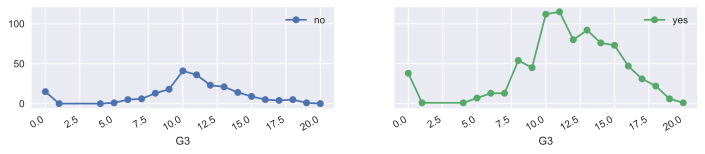

In [793]:
pd.crosstab(data['G3'], data['internet']).plot(subplots=True, 
                                               layout=(5, 4), 
                                               sharex=True, 
                                               sharey=True,
                                               figsize=(25,12),
                                               linestyle='-', 
                                               marker='o')

Большинство студентов пользуются интернетом, и не сильно, но положительно влияет на их итоговую оценку.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BFAB645438>,
      dtype=object)

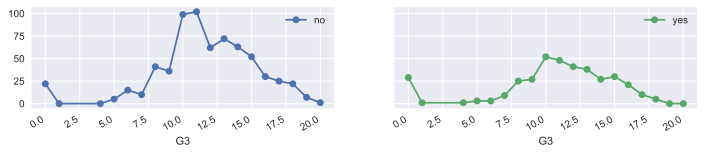

In [794]:
pd.crosstab(data['G3'], data['romantic']).plot(subplots=True, 
                                               layout=(5, 4), 
                                               sharex=True, 
                                               sharey=True,
                                               figsize=(25,12),
                                               linestyle='-', 
                                               marker='o')

Большинство студентов, не имеют романтических связей, и это не сильно влияет на их итоговую оценку в лучшую сторону.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BFA2B23F98>,
      dtype=object)

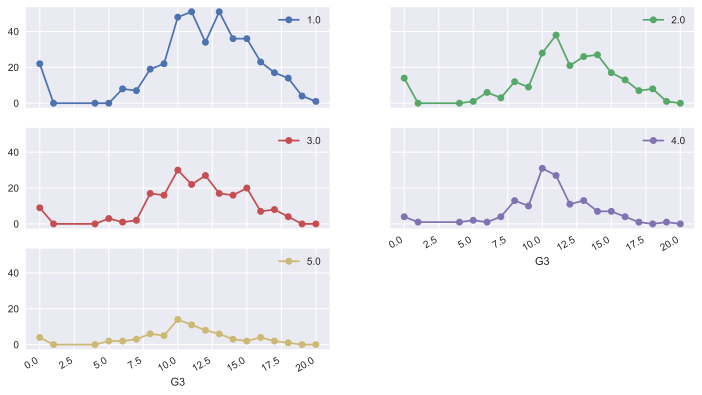

In [795]:
pd.crosstab(data['G3'], data['Walc']).plot(subplots=True, 
                                               layout=(3, 2), 
                                               sharex=True, 
                                               sharey=True,
                                               figsize=(12,7),
                                               linestyle='-', 
                                               marker='o')

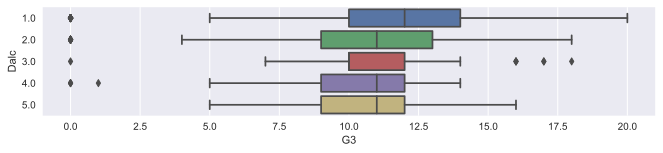

In [796]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 2)
ax = sns.boxplot(y="Dalc", x="G3", data=data, orient="h")

Во всех категориях средний диапозон оценкок от 8 до 20, самая частая оценка это 10. Алкоголь, принимаемй в выходные, не 
влияет на успеваемость студента, лишь большее число студентов не употребляют алкоголь.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BFAC11F160>,
      dtype=object)

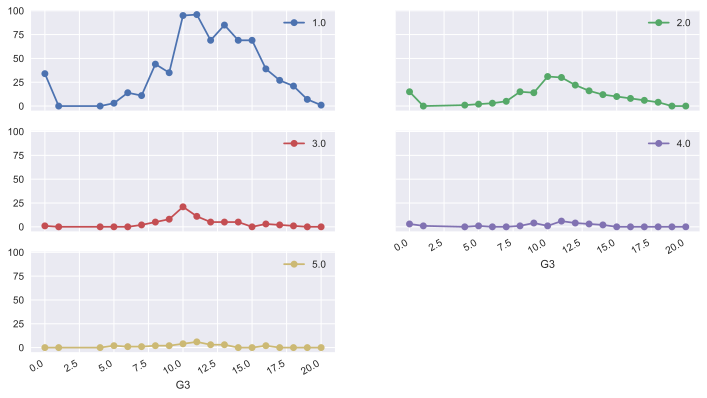

In [798]:
pd.crosstab(data['G3'], data['Dalc']).plot(subplots=True, 
                                               layout=(3, 2), 
                                               sharex=True, 
                                               sharey=True,
                                               figsize=(12,7),
                                               linestyle='-', 
                                               marker='o')

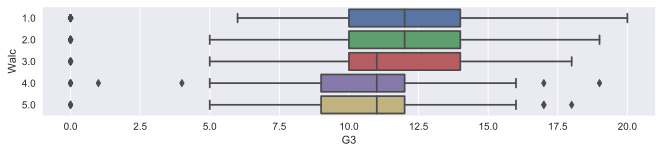

In [799]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 2)
ax = sns.boxplot(y="Walc", x="G3", data=data, orient="h")

Малое количество студентов употребляет алкоголь много или умеренно в будние дни, и алкоголь не повышает количество студентов с плохими оценками или наоборот с хорошими. Среди непьющих и пьющих мало больше студентов, получивших хорошие и отличные оценки. Категория студентов, употребляющих алкоголь в будни "очень мало" самая многочисленная.

### Задание 9  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [800]:
cond = [
    ((data['G3'].ge(18)) & (data['G3'].le(20))),
    ((data['G3'].ge(14)) & (data['G3'].le(17))),
    ((data['G3'].ge(8)) & (data['G3'].le(13))),
    (data['G3'].lt(8))
]

In [801]:
choices = ['excellent', 'good', 'satisfactorily', 'unsatisfactorily']

In [802]:
data['G4'] = np.select(cond, choices)

In [803]:
data.head()

ID Subject school sex  age address famsize Pstatus Medu Fedu      Mjob  \
0  100097  Por     GP     F   16   U       GT3     A       3    4    services   
1  101021  Por     GP     F   17   U       GT3     T       3    2    other      
2  102965  Por     GP     M   16   U       LE3     T       1    2    health     
3  102989  Por     MS     M   17   U       GT3     T       2    3    other      
4  103131  Por     GP     F   16   U       GT3     T       1    1    at_home    

       Fjob  reason guardian traveltime studytime  failures schoolsup famsup  \
0  other     course  father   1          1         0         no        no      
1  other     course  mother   1          2         0         no        no      
2  services  course  mother   2          1         2         no        no      
3  services  home    father   2          2         0         no        no      
4  other     home    mother   2          1         0         no        yes     

  paid activities nursery higher internet romantic famrel freetime goout Dalc  \
0  no   no         yes     yes    yes      no       3.0    2        1     1.0   
1  no   yes        no      yes    yes      no       5.0    3        4     1.0   
2  no   no         no      yes    yes      no       4.0    4        5     3.0   
3  no   yes        yes     yes    yes      no       4.0    4        3     1.0   
4  no   no         yes     yes    no       NaN      4.0    3        2     1.0   

  Walc health  absences cheating  G1  G2  G3  \
0  4.0  5      12        NaN      15  13  14   
1  3.0  3      2         NaN      17  18  17   
2  5.0  5      0         yes      9   8   10   
3  1.0  3      4         no       14  15  16   
4  4.0  5      2         yes      12  13  13   

                                                                       new  \
0  GPF16UGT3A34servicesothercoursefather110nononoyesyesyesno3.0211.04.0512   
1  GPF17UGT3T32otherothercoursemother120nonoyesnoyesyesno5.0341.03.032       
2  GPM16ULE3T12healthservicescoursemother212nonononoyesyesno4.0453.05.050    
3  MSM17UGT3T23otherserviceshomefather220nonoyesyesyesyesno4.0431.01.034     
4  GPF16UGT3T11at_homeotherhomemother210noyesnoyesyesnonan4.0321.04.052      

                                 student_id              G4  
0  7758dd78e873af28e5404b5fdc9e7690f9be689d  good            
1  c17942e0f1a4886af249a854f9bae180a8f4ab52  good            
2  d674a8531e3821474e27e22f43b063e7baaece89  satisfactorily  
3  561972e617e4ef173afa56ef4800134b6476628d  good            
4  f1fb5ba5815474ad6f86ef16496757a54d291152  satisfactorily

In [804]:
tab = pd.crosstab(data['reason'], data['G4'])

In [805]:
new_tab = tab.copy()
for mark in choices:
    val = tab[mark]/data[data['G4'] == mark].shape[0]
    new_df = pd.DataFrame({mark: val})
    new_tab.update(new_df)
print(new_tab)

G4          excellent      good  satisfactorily  unsatisfactorily
reason                                                           
course      0.371429   0.343629  0.433846        0.46            
home        0.228571   0.231660  0.258462        0.22            
other       0.057143   0.088803  0.106154        0.14            
reputation  0.342857   0.335907  0.201538        0.18            


In [806]:
reason_tab = tab.copy().transpose()
reasons = np.unique(data['reason'])
for reason in reasons:
    val = tab.loc[reason]/data[data['reason'] == reason].shape[0]
    new_df = pd.DataFrame({reason: val})
    reason_tab.update(new_df)
print(reason_tab)

reason              course      home     other  reputation
G4                                                        
excellent         0.030233  0.031008  0.018519  0.048387  
good              0.206977  0.232558  0.212963  0.350806  
satisfactorily    0.655814  0.651163  0.638889  0.528226  
unsatisfactorily  0.106977  0.085271  0.129630  0.072581  


Мы видим, что получить неудовлетворительную оценку больше всего вероятность у тех учеников, которые выбрали школу исходя из читаемых курсов, а меньше всего вероятность у тех учеников, которые выбрали школу исходя из других причин. 

Мы видим, что получить удовлетворительную оценку больше всего вероятность у тех учеников, которые выбрали школу из-за читаемых курсов, а меньше всего вероятность у тех учеников, которые выбрали школуисходя из других причин.  

Мы видим, что получить хорошую оценку больше всего вероятность у тех учеников, которые выбрали школу исходя  из читаемых курсов, а меньше всего вероятность у тех учеников, которые выбрали школу исходя из других причин.  

Мы видим, что получить отличную оценку больше всего вероятность у тех учеников, которые выбрали школу исходя из читаемых курсов, а меньше всего вероятность у тех учеников, которые выбрали школу исходя из других причин.

### Задание  10 <a id="task10"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

ПЕРЕД ЗАДАНИЕМ №3 ВЫПОЛНИЛИ ПЕРВУЮ ЧАСТЬ ЗАДАНИЯ №10

In [808]:
# ВТОРАЯ ЧАСТЬ
#выводим статистику разницы оценок по Math и Por
diff = []
for t in range(0, len(ls)):
    diff.append(np.abs(df_sub_drop_filtred.loc[ls[t], "Math"] - df_sub_drop_filtred.loc[ls[t], "Por"]))

print("Max", np.max(diff))
print("Min", np.min(diff))
print("Median", np.median(diff))
print("Mean: ", np.mean(diff))
print("Std: ", np.std(diff))

Max 15.0
Min 0.0
Median 2.0
Mean:  2.3376623376623376
Std:  2.9524825108530686


Можно сделать следующий вывод:
как правило студенты имеют одинаковые оценки по обоим предметам, но есть 
уникумы у которых разница доходит до 15 и 
уникумы которые не сдают оба предмета
    

### Задание 11  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

По логике, количество времени, затрачиваемое на учебы должно влияеть на успеваемость студента, а из задания №5 заметили, что число провалов на предыдущих курсах оказывает сильное влияние на итоговую оценку.

In [809]:
data.failures = data.failures.astype('int64')
data.studytime = data.studytime.astype('int64')

In [810]:
data["G5"] = (2*data['failures'] - data['studytime'])//1

In [811]:
def grade(x, y):
    if x == 3:
        if y == 1:
            return 1
        elif y == 3 or y == 2:
            return 2
        elif  y == 4:
            return 3
    elif x == 2:
        if y == 1:
            return 1
        elif y == 3 or y == 2:
            return 2
        elif y == 4:
            return 3
    elif x == 1:
        if y == 2 or y == 1:
            return 2
        elif y == 3:
            return 3
        elif y == 4:
            return 3
    elif x == 0:
        if y == 1:
            return 2
        elif y == 2 or y == 3:
            return 3
        elif y == 4:
            return 4
        
for i in range(1044):
    data['G5'][i] = grade(data['failures'][i], data['studytime'][i])

In [812]:
data.head(15)

ID Subject school sex  age address famsize Pstatus Medu Fedu  \
0   100097  Por     GP     F   16   U       GT3     A       3    4     
1   101021  Por     GP     F   17   U       GT3     T       3    2     
2   102965  Por     GP     M   16   U       LE3     T       1    2     
3   102989  Por     MS     M   17   U       GT3     T       2    3     
4   103131  Por     GP     F   16   U       GT3     T       1    1     
5   103144  Por     GP     M   18   U       LE3     T       3    1     
6   105257  Por     MS     F   18   U       GT3     T       1    1     
7   107639  Por     MS     F   15   R       GT3     T       4    4     
8   107914  Math    GP     F   15   U       LE3     T       3    2     
9   108089  Por     MS     M   16   R       GT3     T       3    4     
10  108254  Por     GP     M   15   U       LE3     T       4    4     
11  108296  Por     GP     M   18   U       LE3     T       3    4     
12  108753  Math    MS     F   18   R       GT3     T       4    4     
13  108825  Por     GP     M   15   U       GT3     T       4    3     
14  114462  Math    GP     F   16   U       LE3     T       2    2     

        Mjob      Fjob      reason guardian traveltime  studytime  failures  \
0   services  other     course      father   1          1          0          
1   other     other     course      mother   1          2          0          
2   health    services  course      mother   2          1          2          
3   other     services  home        father   2          2          0          
4   at_home   other     home        mother   2          1          0          
5   services  services  course      mother   2          1          0          
6   other     other     course      mother   2          2          0          
7   teacher   other     course      mother   2          1          0          
8   services  other     reputation  mother   1          2          0          
9   other     health    other       mother   3          2          0          
10  health    services  course      father   1          1          0          
11  services  other     home        mother   1          2          0          
12  teacher   at_home   reputation  mother   3          1          0          
13  teacher   other     home        mother   1          2          0          
14  at_home   other     course      mother   1          2          0          

   schoolsup famsup paid activities nursery higher internet romantic famrel  \
0   no        no     no   no         yes     yes    yes      no       3.0     
1   no        no     no   yes        no      yes    yes      no       5.0     
2   no        no     no   no         no      yes    yes      no       4.0     
3   no        no     no   yes        yes     yes    yes      no       4.0     
4   no        yes    no   no         yes     yes    no       NaN      4.0     
5   no        no     no   yes        yes     yes    yes      yes      3.0     
6   no        no     no   yes        yes     yes    no       no       1.0     
7   no        no     no   no         yes     yes    yes      yes      1.0     
8   no        yes    yes  no         yes     yes    yes      no       4.0     
9   no        no     no   no         no      yes    no       no       3.0     
10  no        yes    no   yes        yes     yes    yes      no       4.0     
11  no        no     no   yes        yes     yes    yes      yes      4.0     
12  no        yes    yes  yes        yes     yes    yes      yes      4.0     
13  no        yes    no   yes        yes     yes    yes      no       4.0     
14  no        yes    no   no         yes     yes    no       no       4.0     

   freetime goout Dalc Walc health  absences cheating  G1  G2  G3  \
0   2        1     1.0  4.0  5      12        NaN      15  13  14   
1   3        4     1.0  3.0  3      2         NaN      17  18  17   
2   4        5     3.0  5.0  5      0         yes      9   8   10   
3   4        3     1.0  1.0  3      4         no 

In [813]:
count = 0
for i in range(1044):
    if (data['G4'][i] == 'excellent' and data['G5'][i] != 4) or (data['G4'][i] == 'good' and data['G5'][i] != 3) or (data['G4'][i] == 'satisfactorily' and data['G5'][i] != 2) or (data['G4'][i] == 'unsatisfactorily' and data['G5'][i] != 1):
        count += 1
        
print('Точность оценки G5: ', 100 - (count*100)/1044, '%', sep='')

Точность оценки G5: 45.30651340996169%


### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [814]:
# your code here